In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/AirPassengers.csv")

# Time Series

In [2]:
A.index = pd.to_datetime(A.Month)

In [3]:
A = A.drop(labels=["Month"],axis=1)

In [4]:
A.columns = ["Passengers"]

# Plot

<AxesSubplot:xlabel='Month'>

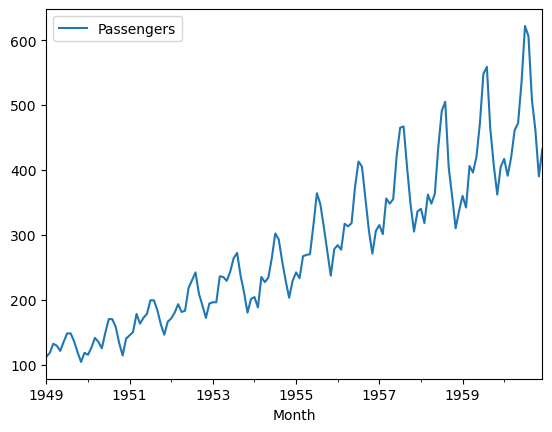

In [5]:
A.plot()

# Decompose

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(A,model='multiplicative')

original = Q.observed
season = Q.seasonal
trend = Q.trend
err = Q.resid

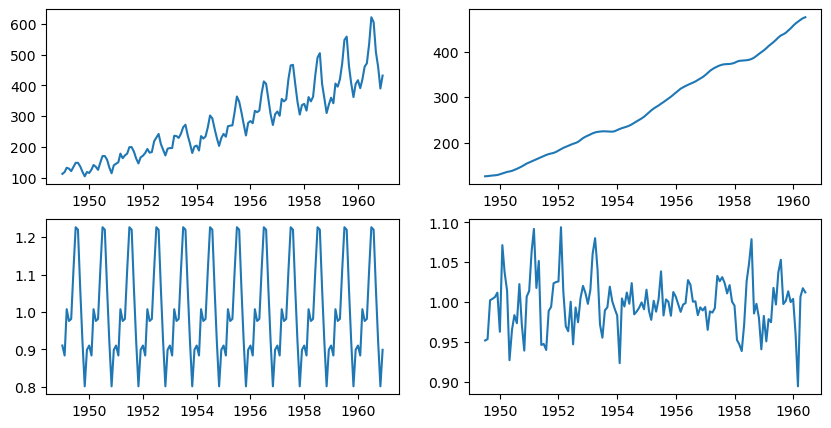

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.plot(original)

plt.subplot(2,2,2)
plt.plot(trend)

plt.subplot(2,2,3)
plt.plot(season)

plt.subplot(2,2,4)
plt.plot(err)

# Test for stationarity¶

In [8]:
RM = A.rolling(window=12).mean()

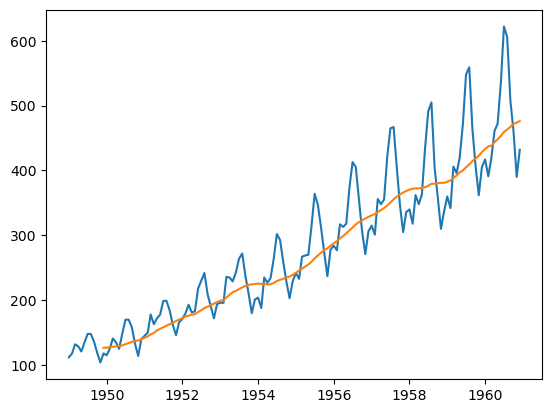

In [9]:
plt.plot(A)
plt.plot(RM)

# Log

In [10]:
import numpy as np
LG = np.log(A)

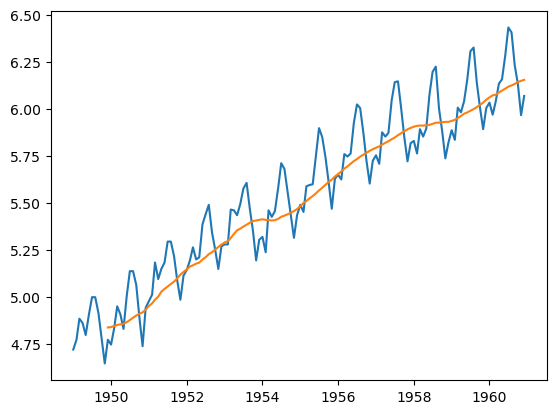

In [11]:
RM_LG = LG.rolling(window=12).mean()
plt.plot(LG)
plt.plot(RM_LG)

# Diff logA,RMLogA¶

In [12]:
Q = LG-RM_LG
Q1 = Q.rolling(window=12).mean()

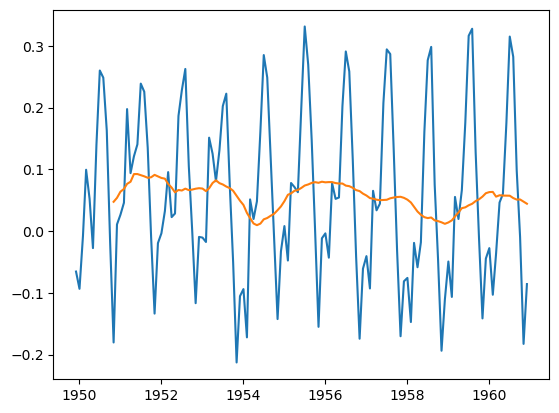

In [13]:
plt.plot(Q)
plt.plot(Q1)

# stationary

In [14]:
Q2 = Q1[Q1.Passengers>0]

In [15]:
trd = Q2[0:97]
tsd = Q2[97:]

In [16]:
tsd

,Passengers
Month,
1958-12-01,0.011837
1959-01-01,0.014049
1959-02-01,0.017438
1959-03-01,0.023642
1959-04-01,0.030158
1959-05-01,0.037202
1959-06-01,0.038538
1959-07-01,0.041839
1959-08-01,0.044291


# AutoRegression Model

In [18]:
from statsmodels.tsa.ar_model import AR
ar = AR(trd).fit()
pred = ar.predict(start="1958-12-01",end="1960-12-01")

C:\Users\Suja4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [19]:
pred

1958-12-01    0.014895
1959-01-01    0.016543
1959-02-01    0.019650
1959-03-01    0.022664
1959-04-01    0.027122
1959-05-01    0.030922
1959-06-01    0.033908
1959-07-01    0.037222
1959-08-01    0.040220
1959-09-01    0.043527
1959-10-01    0.046481
1959-11-01    0.048784
1959-12-01    0.050308
1960-01-01    0.051514
1960-02-01    0.051901
1960-03-01    0.051861
1960-04-01    0.051480
1960-05-01    0.050851
1960-06-01    0.050144
1960-07-01    0.049257
1960-08-01    0.048157
1960-09-01    0.047017
1960-10-01    0.045986
1960-11-01    0.045056
1960-12-01    0.044353
Freq: MS, dtype: float64

In [20]:
len(pred)

25

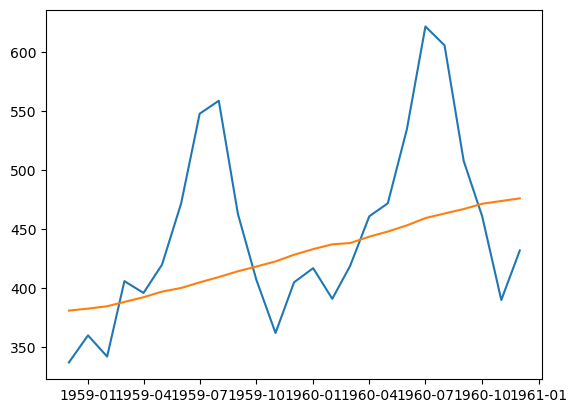

In [21]:
plt.plot(A.tail(25))
plt.plot(RM.tail(25).Passengers + pred)

In [22]:
R = RM.tail(25).Passengers + pred
ACT = A.tail(25)

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ACT,R)

54.058193629053115